In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
# Read and Merge Dengue Data
# loading do CSV de features e labels e merge dos dados:
# loading do CSV de features e labels e merge dos dados:
df_features = pd.read_csv("data/dengue_features_train.csv", na_values=[" ","...","na","NA","nan","Na"])
df_labels = pd.read_csv("data/dengue_labels_train.csv",na_values=[" ","...","na","NA","nan","Na"])
df_dengue = pd.merge(df_features,df_labels)

In [9]:
%%html
<h2> Visualização da característica temporal dos dados:

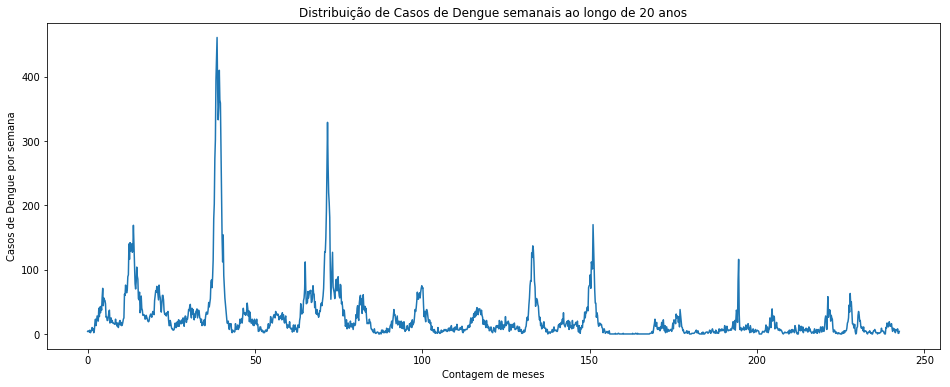

In [10]:
plt.figure(figsize=(16,6))
plt.plot(df_dengue.index/6, df_dengue.total_cases)
plt.title("Distribuição de Casos de Dengue semanais ao longo de 20 anos")
plt.ylabel("Casos de Dengue por semana")
plt.xlabel("Contagem de meses")
plt.show()

In [11]:
### Suprimindo as colunas que identificam nomes e ano, mantendo as semanas anuais.
df_dengue = df_dengue[['weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']]

In [12]:
df_dengue

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [13]:
### Substitute NAs by Mean
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df_dengue_clean = imp.fit(df_dengue).transform(df_dengue)
df_dengue_clean = pd.DataFrame(df_dengue_clean)
df_dengue_clean

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,21.0,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5.0
1452,22.0,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8.0
1453,23.0,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1.0
1454,24.0,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1.0


In [14]:
# Scale Min Max Transform
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_float = scaler.fit_transform(df_dengue_clean)

In [15]:
# converting data to unified dataFrame and after a numpy darray:
#data = pd.merge(pd.DataFrame(X_scaled), pd.DataFrame(y), left_index=True, right_index=True)
#data_float = data.to_numpy()
pd.DataFrame(data_float)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.326923,0.578226,0.614835,0.386418,0.395544,0.031797,0.388291,0.354667,0.314680,0.123457,...,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450,0.008677
1,0.346154,0.629943,0.657063,0.321190,0.359233,0.058423,0.472710,0.441778,0.489213,0.191358,...,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829,0.010846
2,0.365385,0.479441,0.690881,0.311879,0.384430,0.088428,0.548064,0.496000,0.657583,0.166667,...,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201,0.008677
3,0.384615,0.584823,0.770066,0.438912,0.491150,0.039324,0.575260,0.539556,0.643471,0.222222,...,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362,0.006508
4,0.403846,0.658698,0.788882,0.481601,0.509943,0.019252,0.645515,0.593778,0.701541,0.253086,...,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676,0.013015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.384615,0.818931,0.851154,0.490886,0.584064,0.141577,0.621152,0.731556,0.815572,0.734568,...,0.758854,0.141577,0.774093,0.575463,0.769504,0.656950,0.561290,0.706422,0.049696,0.010846
1452,0.403846,0.619290,0.677048,0.273679,0.474367,0.221377,0.488385,0.560000,0.773236,0.660494,...,0.828282,0.221377,0.726560,0.416748,0.641844,0.529785,0.516129,0.642202,0.067366,0.017354
1453,0.423077,0.714304,0.661327,0.480079,0.487587,0.150896,0.259490,0.336000,0.665207,0.475309,...,0.893932,0.150896,0.605194,0.418695,0.319149,0.210393,0.354839,0.412844,0.013620,0.002169
1454,0.442308,0.809270,0.770839,0.531588,0.638162,0.152765,0.226062,0.327111,0.645093,0.512346,...,0.903240,0.152765,0.583143,0.444012,0.429078,0.373046,0.290323,0.577982,0.029450,0.002169


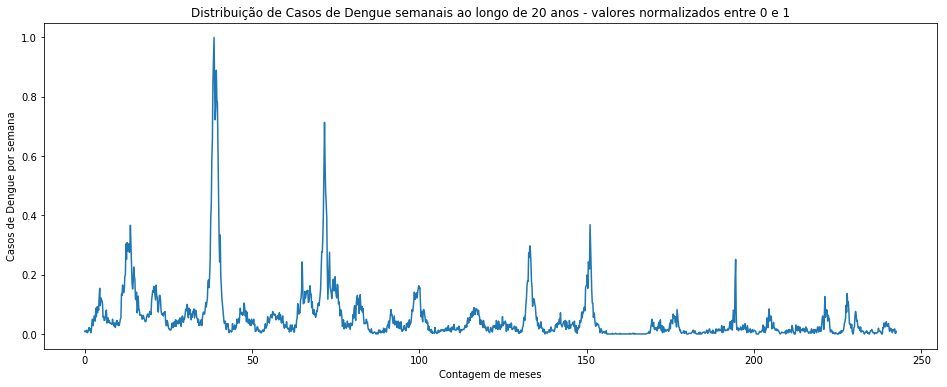

In [18]:
plt.figure(figsize=(16,6))
plt.plot((pd.DataFrame(data_float).index) / 6 , pd.DataFrame(data_float)[21])
plt.title("Distribuição de Casos de Dengue semanais ao longo de 20 anos - valores normalizados entre 0 e 1")
plt.ylabel("Casos de Dengue por semana")
plt.xlabel("Contagem de meses")
plt.show()

In [19]:
data_float[0][21]

0.008676789587852495

In [20]:
%%html
<h3> Preparando os dados para LSTM Keras </h3>

In [21]:
# Esta construção foi baseada no livro Depp Learning with python - Predições climáticas - informações sequenciais e temporais.

# Defining a sequencial temporal information:
# lookback = 16, retornar a análise sobre 16 semanas anteriores ;
# steps = 1 , Observacao para cada semana ;
# delay = 4, 4 semanas de predição para o futuro.

In [22]:
%%html

 data —The original array of floating-point data, which you normalized in listing 6.32.
 lookback —How many timesteps back the input data should go.
 delay —How many timesteps in the future the target should be.
 min_index and max_index —Indices in the data array that delimit which time-
steps to draw from. This is useful for keeping a segment of the data for valida-
tion and another for testing.
 shuffle —Whether to shuffle the samples or draw them in chronological order.
 batch_size —The number of samples per batch.
 step —The period, in timesteps, at which you sample data. You’ll set it to 6 in
order to draw one data point every hour.



In [22]:
#### Generating for timesteps
#def generator(data, loopback, delay, min_index, max_index, shuffle=False, batch_size=32, step=1):
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=1 ):
    if max_index is None:
        max_index = len(data) - delay -1
    i = min_index + lookback
    
    while 1:
        if shuffle:
           rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][21]
        yield samples, targets


In [24]:
# The abstract function GENERATOR will arrange data into training, validation and test sets.

In [23]:
lookback = 53 # 53 semanas anteriores, valor deve ser menor que max_index.
step = 1 
delay = 16 # Previsao das proximas 16 semanas
batch_size=128


In [24]:
train_gen = generator(data_float,
                     lookback=lookback,
                     delay=delay,
                     min_index=0,
                     max_index=1000,
                     shuffle=True,
                     step=step,
                     batch_size=batch_size)

val_gen = generator(data_float,
                   lookback=lookback,
                   delay=delay,
                   min_index=1001,
                   max_index=1300,
                   step=step,
                   batch_size=batch_size)

test_gen = generator(data_float,
                    lookback=lookback,
                    delay=delay,
                    min_index=1301,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)

val_steps = 1300 - 1001 - lookback
test_steps = (len(data_float) - 1301 - lookback)

In [27]:
%%html
<h2> Keras Framework for LSTM </h2>

In [25]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

Using TensorFlow backend.


Epoch 1/40
50/50 [==============================] - 6s 111ms/step - loss: 0.1703 - val_loss: 0.0318
Epoch 2/40
50/50 [==============================] - 4s 79ms/step - loss: 0.0940 - val_loss: 0.0327
Epoch 3/40
50/50 [==============================] - 4s 79ms/step - loss: 0.0763 - val_loss: 0.0403
Epoch 4/40
50/50 [==============================] - 4s 79ms/step - loss: 0.0656 - val_loss: 0.0272
Epoch 5/40
50/50 [==============================] - 4s 79ms/step - loss: 0.0672 - val_loss: 0.0220
Epoch 6/40
50/50 [==============================] - 4s 79ms/step - loss: 0.0609 - val_loss: 0.0254
Epoch 7/40
50/50 [==============================] - 4s 79ms/step - loss: 0.0588 - val_loss: 0.0349
Epoch 8/40
50/50 [==============================] - 4s 79ms/step - loss: 0.0561 - val_loss: 0.0314
Epoch 9/40
50/50 [==============================] - 4s 78ms/step - loss: 0.0589 - val_loss: 0.0516
Epoch 10/40
50/50 [==============================] - 4s 79ms/step - loss: 0.0590 - val_loss: 0.0238
Epoch 11

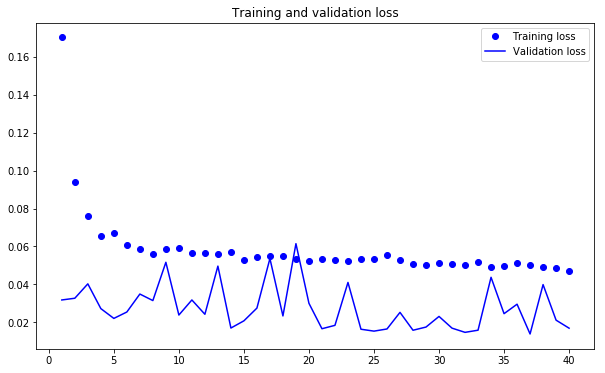

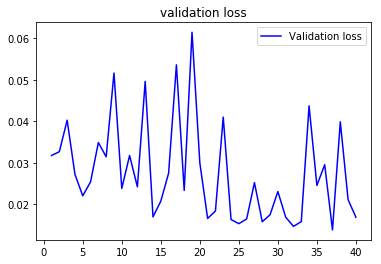

In [26]:
model = Sequential()
model.add(layers.GRU(32,
                    dropout=0.2,
                    recurrent_dropout=0.2,
                    input_shape=(None, data_float.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(train_gen,
                             steps_per_epoch=50,
                             epochs=40,
                             validation_data = val_gen,
                             validation_steps = val_steps)


## Ploting Training vs Validation Data 
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(loss) + 1)
plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


#### Ploting Validation Data Zoom
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('validation loss')
plt.legend()
plt.show()

In [28]:
np.mean(history.history["val_loss"]) * df_dengue.total_cases.std()

1.2019418295470827

In [29]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                5280      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________
None


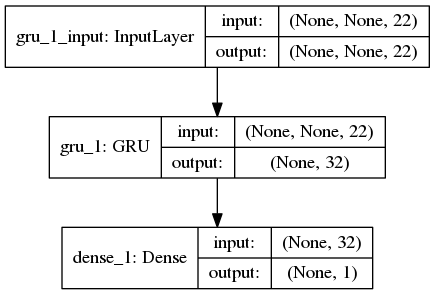

In [32]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)